In [10]:
# IMPORTS

from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
from IPython.display import Audio, display
import soundfile as sf
import io
import base64
from collections import Counter
import pandas as pd

In [11]:
# Load LibriSpeech dataset for English (en_us) and Hindi (hi_in)

dataset = load_dataset("librispeech_asr", "clean", split="validation", streaming=True)

In [12]:
# Inspect contents of dataset

print(dataset)

for item in dataset:
    print(item['text'])
    print('\n')
    print(item['audio'])
    break

IterableDataset({
    features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
    num_shards: 1
})
HE WAS IN A FEVERED STATE OF MIND OWING TO THE BLIGHT HIS WIFE'S ACTION THREATENED TO CAST UPON HIS ENTIRE FUTURE


{'path': '2277-149896-0000.flac', 'array': array([ 0.00186157,  0.0005188 ,  0.00024414, ..., -0.00097656,
       -0.00109863, -0.00146484]), 'sampling_rate': 16000}


In [13]:
def comprehensive_audio_analysis(audio_array, sample_rate, title="Audio Analysis"):
    """
    Comprehensive audio analysis with multiple plots
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Waveform
    time = np.linspace(0, len(audio_array) / sample_rate, len(audio_array))
    axes[0, 0].plot(time, audio_array, color='blue', alpha=0.7)
    axes[0, 0].set_title("Waveform")
    axes[0, 0].set_xlabel("Time (s)")
    axes[0, 0].set_ylabel("Amplitude")
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_array)), ref=np.max)
    im1 = librosa.display.specshow(D, y_axis='hz', x_axis='time', sr=sample_rate, ax=axes[0, 1])
    axes[0, 1].set_title("Spectrogram")
    plt.colorbar(im1, ax=axes[0, 1], format='%+2.0f dB')
    
    # 3. Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=audio_array, sr=sample_rate)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
    im2 = librosa.display.specshow(mel_spec_db, y_axis='mel', x_axis='time', sr=sample_rate, ax=axes[1, 0])
    axes[1, 0].set_title("Mel Spectrogram")
    plt.colorbar(im2, ax=axes[1, 0], format='%+2.0f dB')
    
    # 4. MFCC
    mfccs = librosa.feature.mfcc(y=audio_array, sr=sample_rate)
    im3 = librosa.display.specshow(mfccs, x_axis='time', ax=axes[1, 1])
    axes[1, 1].set_title("MFCC")
    plt.colorbar(im3, ax=axes[1, 1])
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Audio stats
    duration = len(audio_array) / sample_rate
    print(f"   Audio Statistics:")
    print(f"   Duration: {duration:.2f} seconds")
    print(f"   Sample Rate: {sample_rate} Hz")
    print(f"   Samples: {len(audio_array):,}")
    print(f"   Max Amplitude: {np.max(np.abs(audio_array)):.4f}")
    print(f"   RMS Energy: {np.sqrt(np.mean(audio_array**2)):.4f}")
    
    # Audio player
    return Audio(audio_array, rate=sample_rate)

English Transcript: HE WAS IN A FEVERED STATE OF MIND OWING TO THE BLIGHT HIS WIFE'S ACTION THREATENED TO CAST UPON HIS ENTIRE FUTURE



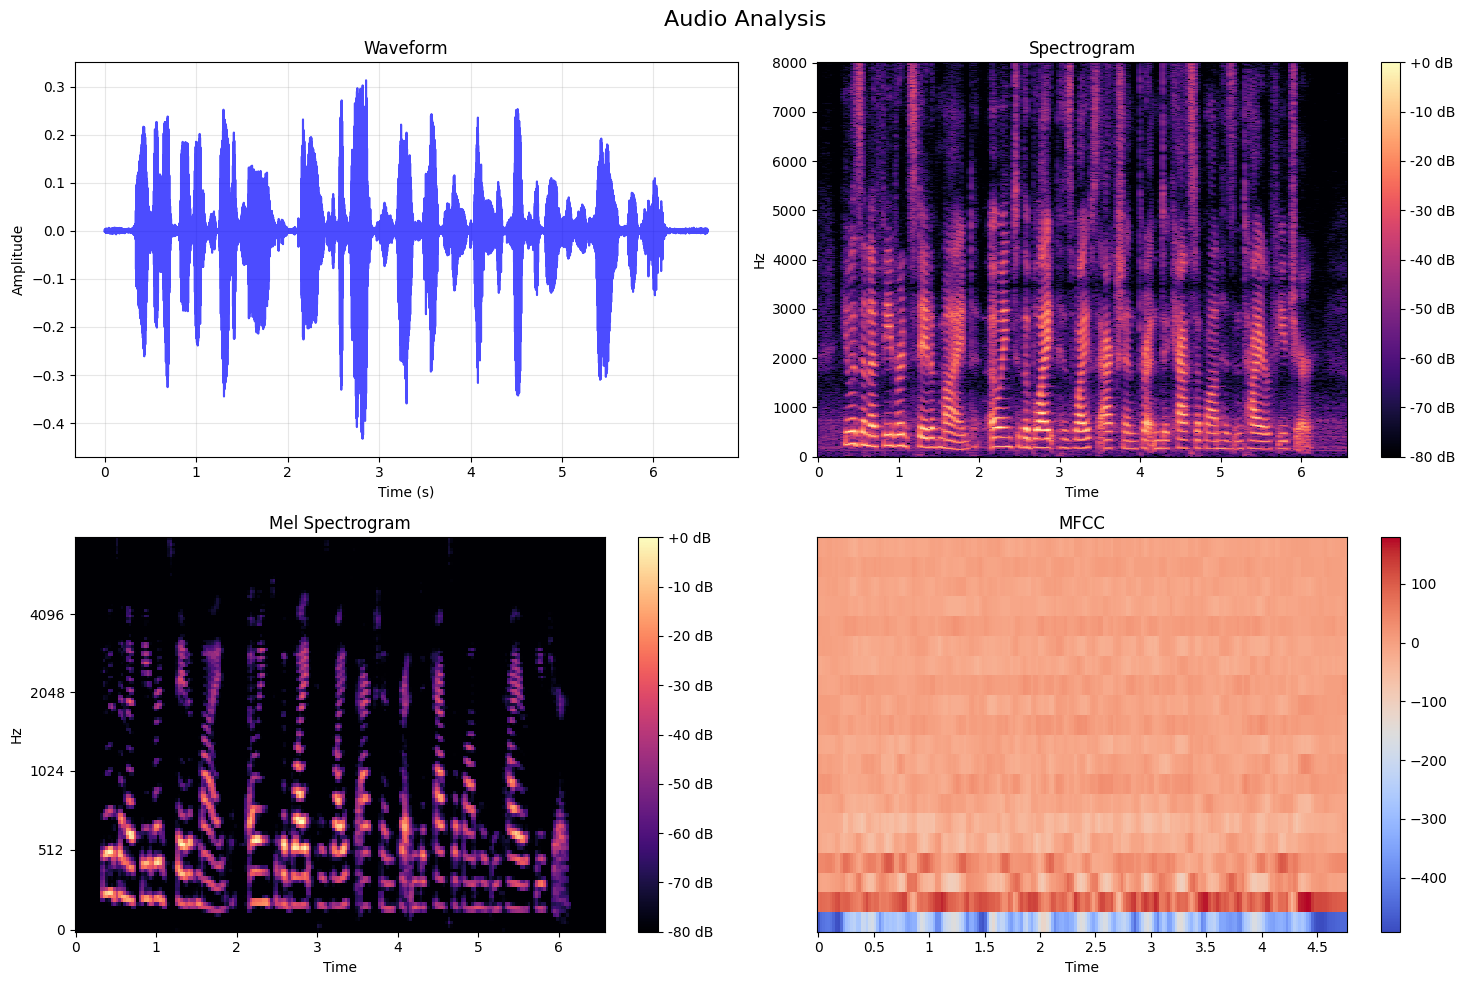

   Audio Statistics:
   Duration: 6.59 seconds
   Sample Rate: 16000 Hz
   Samples: 105,440
   Max Amplitude: 0.4326
   RMS Energy: 0.0477


In [14]:
sample = next(iter(dataset))

# Eng sample eda
print(f"English Transcript: {sample['text']}\n")
comprehensive_audio_analysis(sample["audio"]["array"], sample["audio"]["sampling_rate"], title="Audio Analysis")